# PyPSA-Earth Network Analysis

## Imports

In [1]:
import os
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap
import sys
import pandas as pd
from zipfile import ZipFile
import sys
import xarray
import numpy as np
# module_path = os.path.abspath(os.path.join('../../')) # To import helpers
# if module_path not in sys.path:
#     sys.path.append(module_path+"scripts")
    
# from _helpers import sets_path_to_root, progress_retrieve

# sets_path_to_root("documentation")


c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\networkclustering.py:16: UserWarning: The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 
  warnings.warn(


## Colors

In [2]:
red1 = '#891D2D'
red2 = '#BA3B31'
orange = '#F58221'
yellow = '#FCAF19'
brown = '#440A15'
purple1 = '#3B1053'
purple2 = '#76518E'
purple3 = '#B69DC7'
teal1 = '#032838'
teal2 = '#154655'
teal3 = '#527D77'
teal4 = '#8DB5AF'
green1 = '#294839'
green2 = '#6E966E'
green3 = '#A3BDA3'
beige1 = '#927F48'
beige2 = '#A89677'
beige3 = '#D2CDAD'
pink = '#E78D9A'

plt.rcParams['font.size'] = 18
save_path = "C:/Users/marih/OneDrive/Documents/Figures/"
val_path = "C:/Users/marih/OneDrive/Documents/Figures/Validation/"

zones = ['Northern', 'Oriental', 'Central', 'Southern']
zone_colors=[teal1,teal4,teal2,teal3]

# Define your custom colormap
cmap_zones = ListedColormap(zone_colors)

## Load file

In [4]:
# load file
year = 2021

scenario_name = ""  # scenario name, default value is "" for tutorial or default configuration
                    # value shall be non null if a scenario name is specified under the "run" tag in the config file

scenario_subpath = scenario_name + "/" if scenario_name else ""
solved_network = "/users/marih/test4/pypsa-earth/saved_networks/4_nodes_validation_network/result/elec_s_4_ec_lcopt_Co2L-1H.nc"
n = pypsa.Network(solved_network)


c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, pleas

In [5]:
n.loads_t.p_set.sum().sum()

9451611.659832954

## Checks

In [6]:
n.generators

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,bus,carrier,p_nom_extendable,...,q_set,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
BO0 0 CCGT,inf,0.000000,4.543000e+02,84469.122809,0.500,454.30,47.210673,BO0 0,CCGT,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 0 OCGT,inf,0.000000,3.450000e+01,47234.561404,0.390,34.50,58.394418,BO0 0,OCGT,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 0 onwind,6.670039e+05,44390.495091,0.000000e+00,109295.569252,1.000,0.00,0.024636,BO0 0,onwind,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 0 ror,inf,19.040000,1.904000e+01,270940.715283,0.900,0.00,0.009317,BO0 0,ror,False,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 0 solar,8.019631e+05,158543.967507,6.470000e+01,50855.958267,1.000,64.70,0.019757,BO0 0,solar,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 1 CCGT,inf,0.000000,3.967700e+02,84469.122809,0.500,396.77,47.209381,BO0 1,CCGT,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 1 OCGT,inf,0.000000,4.960500e+02,47234.561404,0.390,496.05,58.395302,BO0 1,OCGT,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 1 onwind,1.068666e+05,2655.718661,2.654000e+01,109295.569252,1.000,26.54,0.025893,BO0 1,onwind,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 1 ror,inf,130.430000,1.304300e+02,270940.715283,0.900,0.00,0.010717,BO0 1,ror,False,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [7]:
p_nom = n.statistics()['Optimal Capacity'].Generator.drop('load')

#p_nom.sum()+n.storage_units.p_nom.sum()

In [8]:
p_nom

carrier
Biomass                 65.580000
Combined-Cycle Gas    1363.990000
Oil                     11.740000
Onshore Wind           127.340001
Open-Cycle Gas         948.920000
Run of River           362.530000
Solar                  609.234595
Name: Optimal Capacity, dtype: float64

In [9]:
p_nom = n.statistics()['Installed Capacity'].Generator.drop('load')

p_nom_opt = n.statistics()['Optimal Capacity'].Generator.drop('load')

extension = (p_nom_opt - p_nom).sum()
display(extension) # sollte alles True sein, solange kein Ausbau stattfindet

p_nom_line = n.statistics()['Installed Capacity'].Line
p_nom_opt_line = n.statistics()['Optimal Capacity'].Line

extension_lines = p_nom_line < p_nom_opt_line
display(extension_lines) # False, wenn Lines nicht extended werden

444.334596497697

carrier
AC    False
dtype: bool

In [10]:
n.statistics()

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                8.848292e-01         1.823225e+07   
            Combined-Cycle Gas     1.131497e-01         1.152150e+08   
            Oil                    3.255992e-09         4.488738e+05   
            Onshore Wind           1.193336e-01         1.391770e+07   
            Open-Cycle Gas         1.450738e-09         4.482182e+07   
            Run of River           9.999995e-01         9.822414e+07   
            Solar                  1.956445e-01         3.098321e+07   
            load                   2.954993e-15         0.000000e+00   
Line        AC                     1.862311e-01         2.314050e+07   
Link        battery charger        3.037718e-01         4.213023e-01   
            battery discharger     2.460551e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        9.999996e-01         0.000000e+00   
Store       Battery Storage        4.999872e-01         4.323072e-01   

                                 Curtailment      Dispatch  \
            carrier                                          
Generator   Biomass                 0.000000  5.083174e+05   
            Combined-Cycle Gas      0.000000  1.351975e+06   
            Oil                     0.000000  3.348540e-04   
            Onshore Wind        12720.362649  1.331165e+05   
            Open-Cycle Gas          0.000000  1.205931e-02   
            Run of River            0.000000  3.175761e+06   
            Solar                5427.850562  1.044134e+06   
            load                    0.000000  1.035430e-04   
Line        AC                           NaN -6.515047e+05   
Link        battery charger              NaN -2.911371e-02   
            battery discharger           NaN -2.620234e-02   
Load        -                            NaN -9.451612e+06   
StorageUnit Reservoir & Dam         0.000000  3.238308e+06   
Store       Battery Storage              NaN  2.710505e-19   

                                Installed Capacity  Market Value  \
            carrier                                                
Generator   Biomass                   6.558000e+01  4.453007e+01   
            Combined-Cycle Gas        1.363990e+03  4.720939e+01   
            Oil                       1.174000e+01  4.211614e+01   
            Onshore Wind              1.273400e+02  3.898219e+01   
            Open-Cycle Gas            9.489200e+02  4.533150e+01   
            Run of River              3.625300e+02  4.019288e+01   
            Solar                     1.649000e+02  2.903062e+01   
            load                      4.000000e+09  4.041728e+04   
Line        AC                        3.932448e+03 -4.664783e-04   
Link        battery charger           0.000000e+00 -1.389109e+00   
            battery discharger        0.000000e+00  3.429976e+00   
Load        -                                  NaN -4.017966e+01   
StorageUnit Reservoir & Dam           3.696700e+02  4.019287e+01   
Store       Battery Storage           0.000000e+00  2.083010e+19   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Biomass                        7.607860e+06      6.558000e+01   
            Combined-Cycle Gas             6.382589e+07      1.363990e+03   
            Oil                            4.361042e-02      1.174000e+01   
            Onshore Wind                   3.326332e+03      1.273400e+02   
            Open-Cycle Gas                 7.042044e-01      9.489200e+02   
            Run of River                   3.307218e+04      3.625300e+02   
            Solar                          2.062557e+04      6.092346e+02   
            load                           1.045491e-01      4.000000e+09   
Line        AC             

In [11]:
n.global_constraints

,sense,constant,mu,type,investment_period,carrier_attribute
GlobalConstraint,,,,,,
CO2Limit,<=,77500000.0,-1.761342e-13,primary_energy,NaN,co2_emissions


In [12]:
n.loads_t.p_set.sum().sum()/1000000

9.451611659832954

# Network components

## Buses

In [14]:
lat = n.buses.head(4).y

lon = n.buses.head(4).x


coordinates_buses = pd.concat([lat, lon], axis=1)
display(coordinates_buses)
         
Southern  = (-19.342000, -65.790486)	#
Northern  = (-17.429067, -67.382533) # 
Oriental = (-17.567400, -63.321900) #  
Central = (-17.393010, -65.704740) # 

,y,x
Bus,,
BO0 0,-19.342000,-65.790486
BO0 1,-17.393010,-65.704740
BO0 2,-17.429067,-67.382533
BO0 3,-17.567400,-63.321900


## Demand verification

In [15]:
display(n.loads_t.p.sum())
n.loads_t.p.sum().sum()/1000

Load
BO0 0    2.614288e+06
BO0 1    1.342394e+06
BO0 2    3.541880e+06
BO0 3    1.953049e+06
dtype: float64

9451.611659832954

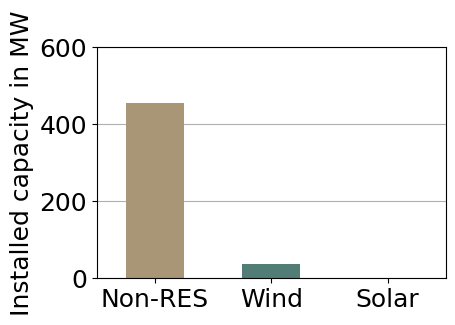

In [16]:
bus = "bus_0_case_1"

n.generators.p_nom.iloc[:3].plot.bar(figsize=(4.5,3),color=[beige2,  teal3,  yellow], zorder = 2)

plt.xticks(rotation = 0, ticks = [0,1,2], labels = ['Non-RES','Wind','Solar',])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,600)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)



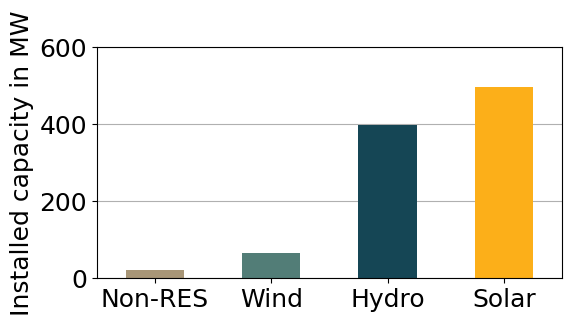

In [17]:
bus = "bus_1_case_1"

n.generators.p_nom.iloc[3:7].plot.bar(figsize=(6,3),color=[beige2,  teal3, teal2, yellow], zorder = 2)

plt.xticks(rotation = 0, ticks = [0,1,2,3], labels = ['Non-RES','Wind','Hydro','Solar',])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,600)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)

In [18]:
bus = "bus_2_case_1"

Bus_2 = n.generators.p_nom.iloc[7:11]


sum_oil_ocgt = Bus_2.loc[["BO 2 OCGT", "BO 2 oil"]].sum()

# Replacing the summed up value with the original values
Bus_2 = Bus_2.drop(["BO 2 OCGT", "BO 2 oil"])
Bus_2 = Bus_2.append(pd.Series([sum_oil_ocgt], index=["Non-RES"]))
display(Bus_2)
Bus_2.plot.bar(figsize=(4.5,3),color=[  teal3,  yellow, beige2], zorder = 3)

plt.xticks(rotation = 0, ticks = [0,1,2], labels = ['Wind','Solar', 'Non-RES'])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,600)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)

KeyError: "None of [Index(['BO 2 OCGT', 'BO 2 oil'], dtype='object', name='Generator')] are in the [index]"

In [19]:
bus = "bus_3_case_1"

bus_3 = n.generators.p_nom.iloc[11:15]
bus_3['BO 3 ror'] = bus_3['BO 3 ror'] + n.storage_units.p_nom['BO 3 hydro']
display(bus_3)
bus_3.plot.bar(figsize=(6,3),color=[beige2, teal3, teal2,yellow], zorder = 3)

plt.xticks(rotation = 0, ticks = [0,1,2,3], labels = ['Non-RES','Wind','Hydro','Solar'])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,600)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)


KeyError: 'BO 3 ror'

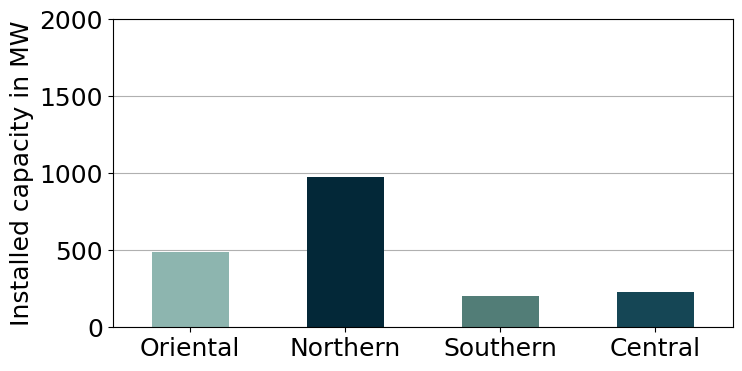

In [20]:
# nodal capacities
node_0 = n.generators.p_nom.iloc[:3].sum()
node_1 = n.generators.p_nom.iloc[3:7].sum()
node_2 = n.generators.p_nom.iloc[7:11].sum()
node_3 = bus_3.sum()

nodal_capacities_case_1 = pd.Series([node_0,node_1,node_2,node_3],['Oriental','Northern','Southern','Central'])
nodal_capacities_case_1.plot.bar(zorder = 2, color=[teal4,teal1,teal3,teal2],figsize=(8,4))
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,2000)
plt.xticks(rotation = 0)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'nodal_capacity_case_1.png', dpi=300, bbox_inches='tight', transparent=True)

## Components and snapshots in the network

In [21]:
n.statistics._parent

PyPSA Network
Components:
 - Bus: 8
 - Carrier: 12
 - Generator: 25
 - GlobalConstraint: 1
 - Line: 4
 - Link: 8
 - Load: 4
 - StorageUnit: 3
 - Store: 4
Snapshots: 8760

## Network analysis

### Lines length

In [22]:
n.lines.length.sum()

1149.3375233313704

## System costs

In [23]:
n.objective / 1e6

77.29298736407601

## Transmission lines Expansion:

In [24]:
(n.lines.s_nom_opt - n.lines.s_nom).head(5) # optimized line capacity compared to original capacity

Line
1   -206.970955
2   -206.970955
3   -827.883822
4   -413.941911
dtype: float64

## Optimised generator capacity:

In [25]:
gen_all = n.generators.groupby("carrier").p_nom_opt.sum()
gen_all = gen_all.drop('load')
#display(gen_all.sum())

hydro_gen = n.storage_units.p_nom_opt.sum()
hydro_gen

print(f'The total optimised generation capacity is: {round(gen_all.sum()+hydro_gen,2)} MW')


# Note: the "load" in the generators represents the Demand Side Response to match the power demand with the supply.

The total optimised generation capacity is: 3859.0 MW


In [26]:
display(n.storage_units)

,p_min_pu,carrier,max_hours,efficiency_dispatch,bus,p_nom,cyclic_state_of_charge,efficiency_store,marginal_cost,build_year,...,sign,marginal_cost_quadratic,capital_cost,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
BO0 0 hydro,0.0,hydro,6.0,0.9,BO0 0,7.46,True,0.0,0.010312,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
BO0 1 hydro,0.0,hydro,6.0,0.9,BO0 1,275.04,True,0.0,0.010960,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
BO0 2 hydro,0.0,hydro,6.0,0.9,BO0 2,87.17,True,0.0,0.009851,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0


# Network Statistics

In [27]:
n.statistics()

# Note: the "load" in the generators represents the Demand Side Response to match the power demand with the supply.

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                8.848292e-01         1.823225e+07   
            Combined-Cycle Gas     1.131497e-01         1.152150e+08   
            Oil                    3.255992e-09         4.488738e+05   
            Onshore Wind           1.193336e-01         1.391770e+07   
            Open-Cycle Gas         1.450738e-09         4.482182e+07   
            Run of River           9.999995e-01         9.822414e+07   
            Solar                  1.956445e-01         3.098321e+07   
            load                   2.954993e-15         0.000000e+00   
Line        AC                     1.862311e-01         2.314050e+07   
Link        battery charger        3.037718e-01         4.213023e-01   
            battery discharger     2.460551e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        9.999996e-01         0.000000e+00   
Store       Battery Storage        4.999872e-01         4.323072e-01   

                                 Curtailment      Dispatch  \
            carrier                                          
Generator   Biomass                 0.000000  5.083174e+05   
            Combined-Cycle Gas      0.000000  1.351975e+06   
            Oil                     0.000000  3.348540e-04   
            Onshore Wind        12720.362649  1.331165e+05   
            Open-Cycle Gas          0.000000  1.205931e-02   
            Run of River            0.000000  3.175761e+06   
            Solar                5427.850562  1.044134e+06   
            load                    0.000000  1.035430e-04   
Line        AC                           NaN -6.515047e+05   
Link        battery charger              NaN -2.911371e-02   
            battery discharger           NaN -2.620234e-02   
Load        -                            NaN -9.451612e+06   
StorageUnit Reservoir & Dam         0.000000  3.238308e+06   
Store       Battery Storage              NaN  2.710505e-19   

                                Installed Capacity  Market Value  \
            carrier                                                
Generator   Biomass                   6.558000e+01  4.453007e+01   
            Combined-Cycle Gas        1.363990e+03  4.720939e+01   
            Oil                       1.174000e+01  4.211614e+01   
            Onshore Wind              1.273400e+02  3.898219e+01   
            Open-Cycle Gas            9.489200e+02  4.533150e+01   
            Run of River              3.625300e+02  4.019288e+01   
            Solar                     1.649000e+02  2.903062e+01   
            load                      4.000000e+09  4.041728e+04   
Line        AC                        3.932448e+03 -4.664783e-04   
Link        battery charger           0.000000e+00 -1.389109e+00   
            battery discharger        0.000000e+00  3.429976e+00   
Load        -                                  NaN -4.017966e+01   
StorageUnit Reservoir & Dam           3.696700e+02  4.019287e+01   
Store       Battery Storage           0.000000e+00  2.083010e+19   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Biomass                        7.607860e+06      6.558000e+01   
            Combined-Cycle Gas             6.382589e+07      1.363990e+03   
            Oil                            4.361042e-02      1.174000e+01   
            Onshore Wind                   3.326332e+03      1.273400e+02   
            Open-Cycle Gas                 7.042044e-01      9.489200e+02   
            Run of River                   3.307218e+04      3.625300e+02   
            Solar                          2.062557e+04      6.092346e+02   
            load                           1.045491e-01      4.000000e+09   
Line        AC             

In [28]:
n.generators_t.p.loc['2013-01-12 23:00:00'].head(17).sum()

1012.1828142874367

In [29]:
n.generators_t.p.loc['2013-01-12 23:00:00']

Generator
BO0 0 CCGT       5.599919e+01
BO0 0 OCGT       4.102125e-07
BO0 0 onwind     2.334751e-08
BO0 0 ror        1.904000e+01
BO0 0 solar      1.385745e+01
BO0 1 CCGT       3.328451e+02
BO0 1 OCGT       4.560225e-07
BO0 1 onwind     0.000000e+00
BO0 1 ror        1.304300e+02
BO0 1 solar      1.211171e-08
BO0 2 OCGT       3.150877e-07
BO0 2 biomass    4.940000e+00
BO0 2 oil        4.011016e-08
BO0 2 onwind     0.000000e+00
BO0 2 ror        2.130600e+02
BO0 2 solar      1.907608e+00
BO0 3 CCGT       2.401035e+02
BO0 3 OCGT       3.066420e-07
BO0 3 biomass    6.064000e+01
BO0 3 onwind     1.719043e+00
BO0 3 solar      0.000000e+00
BO0 0 load       2.974144e-06
BO0 1 load       2.975365e-06
BO0 2 load       2.975619e-06
BO0 3 load       2.973544e-06
Name: 2013-01-12 23:00:00, dtype: float64

In [30]:
max_gen = 47.22+872.95+31.32+607.31+ 732/2
max_gen

1924.8000000000002

In [31]:
n.loads_t.p_set.sum(axis = 1).max()

1444.2118569872018

In [32]:
n.loads_t.p_set.sum(axis = 1)['2013-01-12 00:00:00':'2013-01-13 00:00:00']

snapshot
2013-01-12 00:00:00    1260.805485
2013-01-12 01:00:00    1197.709387
2013-01-12 02:00:00    1077.822799
2013-01-12 03:00:00     952.636138
2013-01-12 04:00:00     918.649860
2013-01-12 05:00:00     848.458335
2013-01-12 06:00:00     834.301632
2013-01-12 07:00:00     830.961203
2013-01-12 08:00:00     848.860046
2013-01-12 09:00:00     922.776296
2013-01-12 10:00:00     926.467891
2013-01-12 11:00:00    1039.483004
2013-01-12 12:00:00    1159.522385
2013-01-12 13:00:00    1229.318118
2013-01-12 14:00:00    1261.728231
2013-01-12 15:00:00    1250.823860
2013-01-12 16:00:00    1250.823860
2013-01-12 17:00:00    1243.814558
2013-01-12 18:00:00    1243.215222
2013-01-12 19:00:00    1243.725440
2013-01-12 20:00:00    1245.773249
2013-01-12 21:00:00    1259.953762
2013-01-12 22:00:00    1433.648719
2013-01-12 23:00:00    1444.211857
2013-01-13 00:00:00    1416.123763
dtype: float64

In [33]:
np.argmax(n.loads_t.p_set.sum(axis = 1))

287

In [34]:
n.statistics.expanded_capacity

<bound method StatisticsAccessor.expanded_capacity of <pypsa.statistics.StatisticsAccessor object at 0x0000025402F77D00>>

## Extension?!

In [35]:
p_nom = n.statistics()['Installed Capacity'].Generator.drop('load')

p_nom_opt = n.statistics()['Optimal Capacity'].Generator.drop('load')

extension = p_nom == p_nom_opt
display(extension) # sollte alles True sein, solange kein Ausbau stattfindet

p_nom_line = n.statistics()['Installed Capacity'].Line
p_nom_opt_line = n.statistics()['Optimal Capacity'].Line

extension_lines = p_nom_line < p_nom_opt_line
display(extension_lines) # False, wenn Lines nicht extended werden 

carrier
Biomass               False
Combined-Cycle Gas    False
Oil                   False
Onshore Wind          False
Open-Cycle Gas        False
Run of River           True
Solar                 False
dtype: bool

carrier
AC    False
dtype: bool

## Curtailment

In [36]:
# Curtailment berechnung:     
max_generation = n.generators.p_nom_opt * n.generators_t.p_max_pu
max_generation_ren = max_generation[[col for col in max_generation.columns if 'solar' in col or "wind" in col or 'ror' in col]]
production_ren = production_renewables = n.generators_t.p[[col for col in n.generators_t.p.columns if 'solar' in col or "wind" in col or 'ror' in col]]
tot_curtailment_calculation = (max_generation_ren - production_ren).sum().sum()#=-24411121.055268362 => generation>max generation
tot_curtailment_calculation

18147.83239753997

In [37]:
n.generators_t.p_max_pu.mean()

Generator
BO0 0 onwind    0.107579
BO0 0 solar     0.201055
BO0 1 onwind    0.051714
BO0 1 solar     0.159982
BO0 2 onwind    0.053657
BO0 2 solar     0.174342
BO0 3 onwind    0.151543
BO0 3 solar     0.140165
dtype: float64

## Line flows

In [38]:
n.stores

,bus,carrier,e_cyclic,e_nom_extendable,capital_cost,marginal_cost,build_year,e_nom_opt,type,e_nom,...,e_max_pu,e_initial,e_initial_per_period,e_cyclic_per_period,p_set,q_set,sign,marginal_cost_quadratic,standing_loss,lifetime
Store,,,,,,,,,,,,,,,,,,,,,
BO0 0 battery,BO0 0 battery,battery,True,True,15877.883774,0.010724,0,0.000007,,0.0,...,1.0,0.0,False,True,0.0,0.0,1.0,0.0,0.0,inf
BO0 1 battery,BO0 1 battery,battery,True,True,15877.883774,0.010032,0,0.000007,,0.0,...,1.0,0.0,False,True,0.0,0.0,1.0,0.0,0.0,inf
BO0 2 battery,BO0 2 battery,battery,True,True,15877.883774,0.009420,0,0.000007,,0.0,...,1.0,0.0,False,True,0.0,0.0,1.0,0.0,0.0,inf
BO0 3 battery,BO0 3 battery,battery,True,True,15877.883774,0.009681,0,0.000007,,0.0,...,1.0,0.0,False,True,0.0,0.0,1.0,0.0,0.0,inf


In [39]:
n.generators.capital_cost

Generator
BO0 0 CCGT        84469.122809
BO0 0 OCGT        47234.561404
BO0 0 onwind     109295.569252
BO0 0 ror        270940.715283
BO0 0 solar       50855.958267
BO0 1 CCGT        84469.122809
BO0 1 OCGT        47234.561404
BO0 1 onwind     109295.569252
BO0 1 ror        270940.715283
BO0 1 solar       50855.958267
BO0 2 OCGT        47234.561404
BO0 2 biomass    278015.359506
BO0 2 oil         38234.561404
BO0 2 onwind     109295.569252
BO0 2 ror        270940.715283
BO0 2 solar       50855.958267
BO0 3 CCGT        84469.122809
BO0 3 OCGT        47234.561404
BO0 3 biomass    278015.359506
BO0 3 onwind     109295.569252
BO0 3 solar       50855.958267
BO0 0 load            0.000000
BO0 1 load            0.000000
BO0 2 load            0.000000
BO0 3 load            0.000000
Name: capital_cost, dtype: float64

In [40]:
n.lines_t.p0
n.lines

,bus0,bus1,length,num_parallel,carrier,type,s_max_pu,s_nom,capital_cost,s_nom_extendable,...,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
1,BO0 0,BO0 1,271.133253,0.289474,AC,Al/St 240/40 4-bundle 380.0,0.7,491.556019,10331.379472,True,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,BO0 0,BO0 2,338.799179,0.289474,AC,Al/St 240/40 4-bundle 380.0,0.7,491.556019,12911.700910,True,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,BO0 1,BO0 2,222.573632,1.157895,AC,Al/St 240/40 4-bundle 380.0,0.7,1966.224077,8482.050811,True,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,BO0 1,BO0 3,316.831460,0.578947,AC,Al/St 240/40 4-bundle 380.0,0.7,983.112038,12070.915048,True,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [41]:
n.generators.capital_cost

Generator
BO0 0 CCGT        84469.122809
BO0 0 OCGT        47234.561404
BO0 0 onwind     109295.569252
BO0 0 ror        270940.715283
BO0 0 solar       50855.958267
BO0 1 CCGT        84469.122809
BO0 1 OCGT        47234.561404
BO0 1 onwind     109295.569252
BO0 1 ror        270940.715283
BO0 1 solar       50855.958267
BO0 2 OCGT        47234.561404
BO0 2 biomass    278015.359506
BO0 2 oil         38234.561404
BO0 2 onwind     109295.569252
BO0 2 ror        270940.715283
BO0 2 solar       50855.958267
BO0 3 CCGT        84469.122809
BO0 3 OCGT        47234.561404
BO0 3 biomass    278015.359506
BO0 3 onwind     109295.569252
BO0 3 solar       50855.958267
BO0 0 load            0.000000
BO0 1 load            0.000000
BO0 2 load            0.000000
BO0 3 load            0.000000
Name: capital_cost, dtype: float64

In [42]:
n.generators.groupby('carrier').capital_cost.mean()

carrier
CCGT        84469.122809
OCGT        47234.561404
biomass    278015.359506
load            0.000000
oil         38234.561404
onwind     109295.569252
ror        270940.715283
solar       50855.958267
Name: capital_cost, dtype: float64

In [43]:
n.stores.capital_cost

Store
BO0 0 battery    15877.883774
BO0 1 battery    15877.883774
BO0 2 battery    15877.883774
BO0 3 battery    15877.883774
Name: capital_cost, dtype: float64

## CAPEX and OPEX

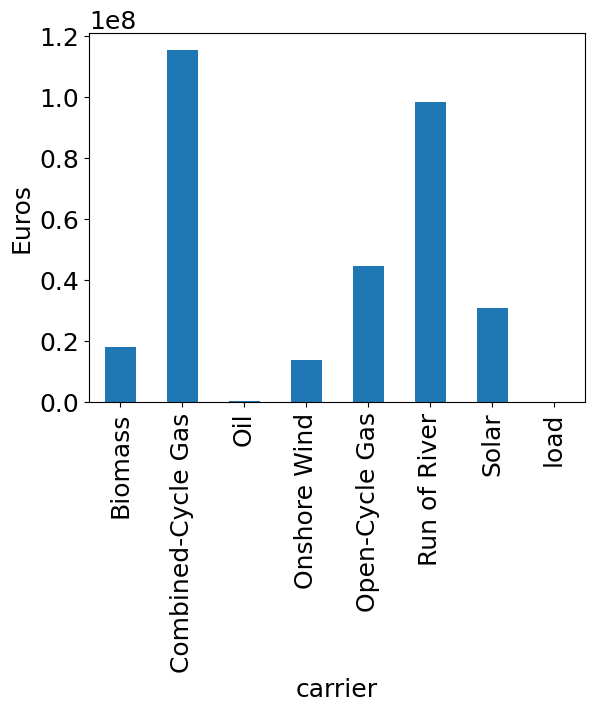

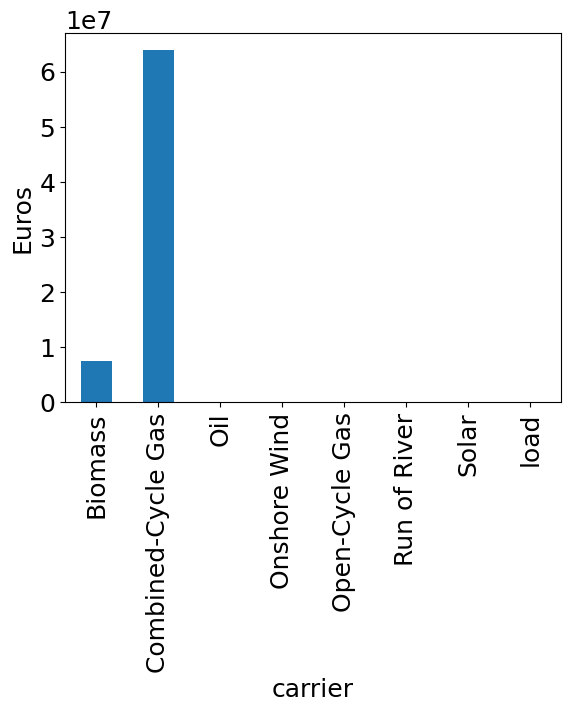

In [44]:
n.statistics()["Capital Expenditure"].loc["Generator"].plot.bar(ylabel="Euros")
plt.show()
n.statistics()["Operational Expenditure"].loc["Generator"].plot.bar(ylabel="Euros")
plt.show()

## Marginal costs

In [45]:
# Marginal costs of the network we look at
mc = n.generators.groupby('carrier').max().marginal_cost
mc_hydro = pd.Series(n.storage_units.marginal_cost.mean(),index = ['hydro'])
#print(f'Marginal costs of the three hydro storage units: {n.storage_units.marginal_cost}')

mc_total = pd.Series(mc)
mc_total = mc_total.append(mc_hydro).sort_values()
mc_total = mc_total.drop('load')
display(mc_total)

# Marginal costs of the reference network without subsidies

mc_ref = ref.generators.groupby('carrier').max().marginal_cost
mc_hydro_ref = pd.Series(ref.storage_units.marginal_cost.mean(),index = ['hydro'])
#print(f'Marginal costs of the three hydro storage units: {ref.storage_units.marginal_cost}')

mc_total_ref = pd.Series(mc_ref)
mc_total_ref = mc_total_ref.append(mc_hydro_ref).sort_values()
mc_total_ref = mc_total_ref.drop('load')
#display(mc_total_ref)


cap = n.generators.groupby('carrier').sum().p_nom_opt
cap = cap.drop('load')

cap_hydro = n.storage_units.p_nom_opt.sort_values(ascending = False)

width = cap_hydro.append(cap)

df = pd.DataFrame({'Capacity': width, 'Marginal Costs': mc_total})
sorted_df = df.sort_values(by='Marginal Costs')
print(mc_total_ref.index)
#fig, ax = plt.subplots(figsize = (10,4))

# Create the bar plot with different widths
#ax.bar(sorted_df.index, sorted_df['Marginal Costs'].values) #, width = sorted_df['Capacity'].values/2000
#print([mc_total['biomass'],mc_total['CCGT':'oil'].values])
# Set labels and title
# ax.set_xlabel('Carriers')
# ax.set_ylabel('€/MWh')
# ax.set_title('Marginal Costs')
# plt.show()
fig, axs = plt.subplots(2,2, figsize=(13,5))
plt.subplots_adjust(left=0.15, right=0.88, bottom=0.14, top=0.85, wspace=0.25, hspace=0.35)

axs[1,0].bar(['hydro','solar','onwind'] ,[mc_total['hydro'], mc_total['solar'],mc_total['onwind']], 
             color = [teal2,yellow,teal3],width=[0.5,0.5,0.5])


axs[1,1].bar(['biomass','CCGT','OCGT','oil'], [2,mc_total['CCGT'],mc_total['OCGT'], mc_total['oil']], #mc_total['biomass']
             color = [green3,beige1,beige3, brown], width=[0.7,0.7,0.7,0.7])


axs[0,0].bar(mc_total_ref.loc['hydro':'onwind'].index,mc_total_ref.loc['hydro':'onwind'], 
             color = [teal2,yellow,teal3],width=[0.5,0.5,0.5])
axs[0,0].set_title('No fuel')

axs[0,1].bar(mc_total_ref.loc['biomass':'oil'].index, mc_total_ref.loc['biomass':'oil'], 
             color = [green3,beige1,beige3, brown], width=[0.7,0.7,0.7,0.7])
axs[0,1].set_title('Fuel necessary')

fig.text(0.04, 0.5, 'Marginal costs in €/MWh', va='center', rotation='vertical')
#sorted_df['Capacity'].values/1000

plt.savefig(save_path+'marginal_cost_comparison.pdf', dpi=300, format='pdf', bbox_inches='tight')

AttributeError: 'Series' object has no attribute 'append'

## Emissions


In [52]:
n=n
emissions = n.generators_t.p / n.generators.efficiency * n.generators.carrier.map(n.carriers.co2_emissions) # t/h
n.snapshot_weightings.generators @ emissions.sum(axis=1).div(1e6) # Mt

#print('Emissions in 2021: ',emissions.sum(axis=1).sum(),' t CO2')
n.carriers.co2_emissions
n.generators_t.p
n.generators.carrier.map(n.carriers.co2_emissions)
emissions.sum().sum()/1000000

0.5056384906324966

In [46]:
n.carriers.co2_emissions

Carrier
CCGT          0.187
biomass       0.000
oil           0.248
geothermal    0.026
OCGT          0.187
hydro         0.000
onwind        0.000
solar         0.000
PHS           0.000
ror           0.000
battery       0.000
Load          0.000
Name: co2_emissions, dtype: float64

In [47]:
n.cost()

AttributeError: 'Network' object has no attribute 'cost'

# Dispatch

CCGT  1351974.5578580284
OCGT  0.012059314401208781
Oil   0.0003348540085452808
Wind  133116.45618969947
Solar  1044134.2648925951
Biomass  508317.36524569994
Battery -1.1858461261560205e-19
Hydro 3238307.778415865
Demand  -9451611.659832954


C:\Users\marih\AppData\Local\Temp\ipykernel_29164\3355858116.py:12: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  CCGT = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["CCGT"]
C:\Users\marih\AppData\Local\Temp\ipykernel_29164\3355858116.py:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  OCGT = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["OCGT"]
C:\Users\marih\AppData\Local\Temp\ipykernel_29164\3355858116.py:18: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Oil = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["oil"]
C:\Users\marih\AppData\Local\Temp\ipykernel_29164\3355858116.py:21: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` wi

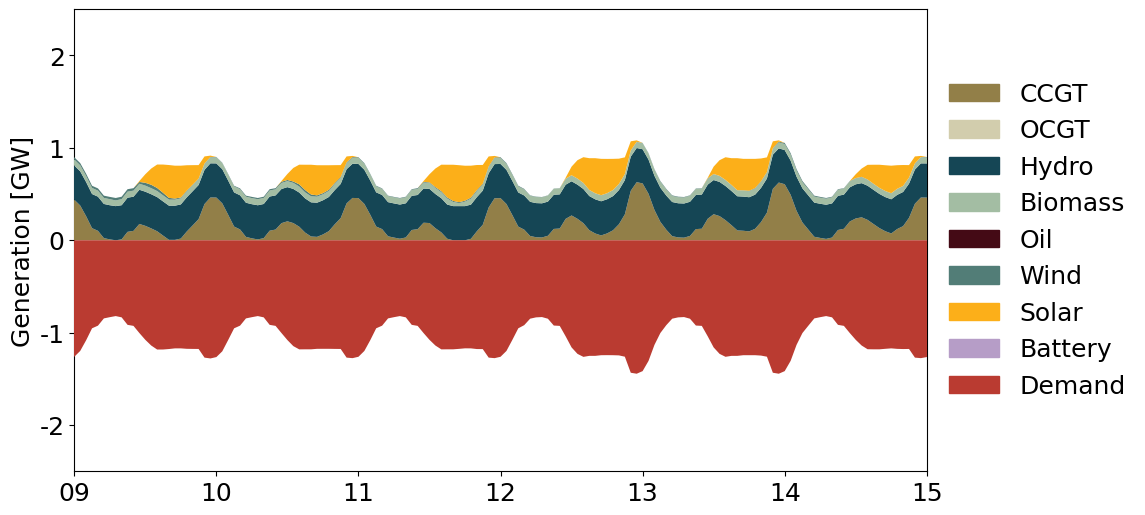

In [48]:
#n = val

# first_date = "2013-01-09"
# second_date = "2013-01-15"
#first_date = "2013-01-01"
#second_date = "2014-01-01"

first_date = "2013-01-01"
second_date = "2014-01-01"


CCGT = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["CCGT"]
print('CCGT ',CCGT.sum())

OCGT = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["OCGT"]
print('OCGT ',OCGT.sum())

Oil = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["oil"]
print('Oil  ',Oil.sum())

Onwind = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["onwind"]
print('Wind ',Onwind.sum())

solar = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["solar"]
print('Solar ',solar.sum())

biomass = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["biomass"]
print('Biomass ',biomass.sum())

#geothermal = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["geothermal"]
#print('Geothermal ',geothermal.sum())

#H2 = n.stores_t.p.loc[first_date:second_date].groupby(n.stores.carrier, axis=1).sum()["H2"]
#print('H2 ', H2.sum())

battery = n.stores_t.p.loc[first_date:second_date].groupby(n.stores.carrier, axis=1).sum()["battery"]
print('Battery', battery.sum())

Hydro = n.storage_units_t.p_dispatch[first_date:second_date].sum(axis=1)
print('Hydro', Hydro.sum())

#ror = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["ror"]
#print('ROR ',ror.sum())

demand = n.loads_t.p_set.loc[first_date:second_date].sum(axis=1)*-1
print('Demand ',demand.sum())


fig, ax=plt.subplots(figsize = (11,6))
i=0
nbattery = []
pbattery =[]
for i in battery:
    if i < 0:
        nbattery.append(i)
    else:
        nbattery.append(0) 
for i in battery:
    if i > 0:
        pbattery.append(i)
    else:
        pbattery.append(0) 



#plt.figure(figsize=(8, 3))
A = plt.stackplot(CCGT.index,CCGT,OCGT,Hydro,biomass,Oil,Onwind, solar,pbattery, #,pbattery
                  colors=[beige1,beige3,teal2,green3,brown,teal3,yellow, purple3], zorder = 3) #,   purple3
plt.stackplot(CCGT.index,demand, nbattery, colors=[red2,purple3], zorder = 3) #,nbattery
plt.xticks(rotation = 0)
plt.yticks()
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
myFmt = mdates.DateFormatter('%d')
ax.xaxis.set_major_formatter(myFmt)
#ax.set_xticks(np.arange(0,200))
ax.set_ylabel('Generation [GW]')
start_date = "2013-01-09"
end_date = "2013-01-15"

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

ax.set_xlim(start_date, end_date)
ax.set_ylim(-2500, 2500)
#ax.set_title(scen,y = 1.03)

CCGT_patch = mpatches.Patch(color=beige1, label ='CCGT')
OCGT_patch = mpatches.Patch(color=beige3, label ='OCGT')
wind_patch = mpatches.Patch(color=teal3, label ='Wind')
solar_patch = mpatches.Patch(color=yellow, label ='Solar')
#ror_patch = mpatches.Patch(color='blue', label ='ROR')
battery_patch = mpatches.Patch(color=purple3, label ='Battery')
load_patch = mpatches.Patch(color=red2, label ='Demand')
hydro_patch = mpatches.Patch(color = teal2, label = 'Hydro')
biomass_patch = mpatches.Patch(color = green3, label = 'Biomass')
oil_patch = mpatches.Patch(color = brown, label = 'Oil')
handles=[CCGT_patch,OCGT_patch,hydro_patch,biomass_patch,oil_patch,wind_patch, solar_patch,battery_patch, load_patch] #battery_patch,
ax.legend(handles=handles, frameon = False, loc='center left', bbox_to_anchor=(1, 0.5))

#plt.savefig(val_path +f'{case}_dispatch.pdf', dpi=300, bbox_inches='tight')
#plt.savefig(val_path +f'{case}_dispatch.png', dpi=300, bbox_inches='tight')




## RES Share

In [49]:
res_share = (Hydro.sum()+biomass.sum()+Onwind.sum()+solar.sum())/demand.sum()*(-1)
res_share*100 # in %

52.095621804576794

## Dispatch OSM PP

OCGT  0.012059314401208781
Oil   0.0003348540085452808
Wind  133116.45618969947
Solar  1044134.2648925951
ror  3175761.2303930065
Hydro 6414069.008808872
Demand  -9451611.659832954


C:\Users\marih\AppData\Local\Temp\ipykernel_29164\1219345253.py:13: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  OCGT = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["OCGT"]
C:\Users\marih\AppData\Local\Temp\ipykernel_29164\1219345253.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Oil = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["oil"]
C:\Users\marih\AppData\Local\Temp\ipykernel_29164\1219345253.py:19: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Onwind = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["onwind"]
C:\Users\marih\AppData\Local\Temp\ipykernel_29164\1219345253.py:22: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)

NameError: name 'case' is not defined

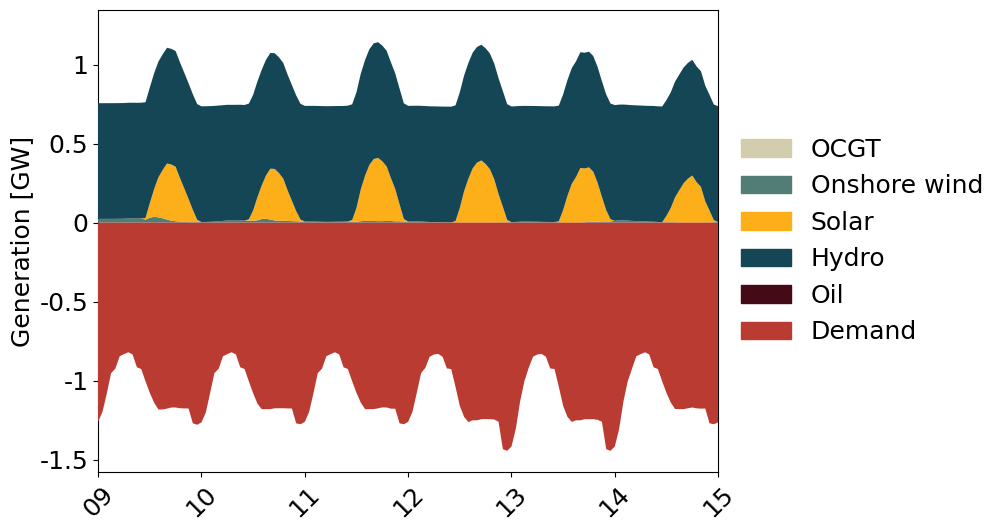

In [63]:
# No custom PP

n=n

first_date = "2013-01-01"
second_date = "2014-01-01"

# first_date = "2013-01-01"
# second_date = "2013-01-14"
#CCGT = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["CCGT"]
#print('CCGT ',CCGT.sum())

OCGT = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["OCGT"]
print('OCGT ',OCGT.sum())

Oil = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["oil"]
print('Oil  ',Oil.sum())

Onwind = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["onwind"]
print('Wind ',Onwind.sum())

solar = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["solar"]
print('Solar ',solar.sum())

ror = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["ror"]
print('ror ',ror.sum())



#biomass = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["biomass"]
#print('Biomass ',biomass.sum())

#geothermal = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["geothermal"]
#print('Geothermal ',geothermal.sum())

#H2 = n.stores_t.p.loc[first_date:second_date].groupby(n.stores.carrier, axis=1).sum()["H2"]
#print('H2 ', H2.sum())

#battery = n.stores_t.p.loc[first_date:second_date].groupby(n.stores.carrier, axis=1).sum()["battery"]
#print('Battery', battery.sum())

Hydro = n.storage_units_t.p_dispatch[first_date:second_date].sum(axis=1)+ n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["ror"]
print('Hydro', Hydro.sum())

demand = n.loads_t.p_set.loc[first_date:second_date].sum(axis=1)*-1
print('Demand ',demand.sum())


fig, ax=plt.subplots(figsize=(8, 6))
i=0
# nbattery = []
# pbattery =[]
# for i in battery:
#     if i < 0:
#         nbattery.append(i)
#     else:
#         nbattery.append(0) 
# for i in battery:
#     if i > 0:
#         pbattery.append(i)
#     else:
#         pbattery.append(0) 

#plt.figure(figsize=(8, 3))
A = plt.stackplot(OCGT.index,OCGT,Onwind, solar, Hydro,Oil, 
                  colors=[beige3,teal3,yellow, teal2,  brown], zorder = 3)
plt.stackplot(OCGT.index,demand, colors=[red2], zorder = 3)
plt.xticks(rotation = 45)
plt.yticks()
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
myFmt = mdates.DateFormatter('%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Generation [GW]')
#ax.set_xlabel('Mar')

start_date = "2013-01-09"
end_date = "2013-01-15"

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

ax.set_xlim(start_date, end_date)

#CCGT_patch = mpatches.Patch(color=beige1, label ='CCGT')
OCGT_patch = mpatches.Patch(color=beige3, label ='OCGT')
wind_patch = mpatches.Patch(color=teal3, label ='Onshore wind')
solar_patch = mpatches.Patch(color=yellow, label ='Solar')
#H2_patch = mpatches.Patch(color=purple1, label ='Hydrogen')
#battery_patch = mpatches.Patch(color=purple3, label ='Battery')
load_patch = mpatches.Patch(color=red2, label ='Demand')
hydro_patch = mpatches.Patch(color = teal2, label = 'Hydro')
#ror_patch = mpatches.Patch(color = 'blue', label = 'Run of River')
oil_patch = mpatches.Patch(color = brown, label = 'Oil')
handles=[OCGT_patch,wind_patch,solar_patch, hydro_patch, oil_patch,load_patch]
ax.legend(handles=handles, frameon = False, loc='center left', bbox_to_anchor=(1, 0.5))
#fig.savefig("path")

plt.savefig(val_path +f'Power_mix/val_{case}_dispatch.pdf', dpi=300, bbox_inches='tight')

# Power Mix with Battery

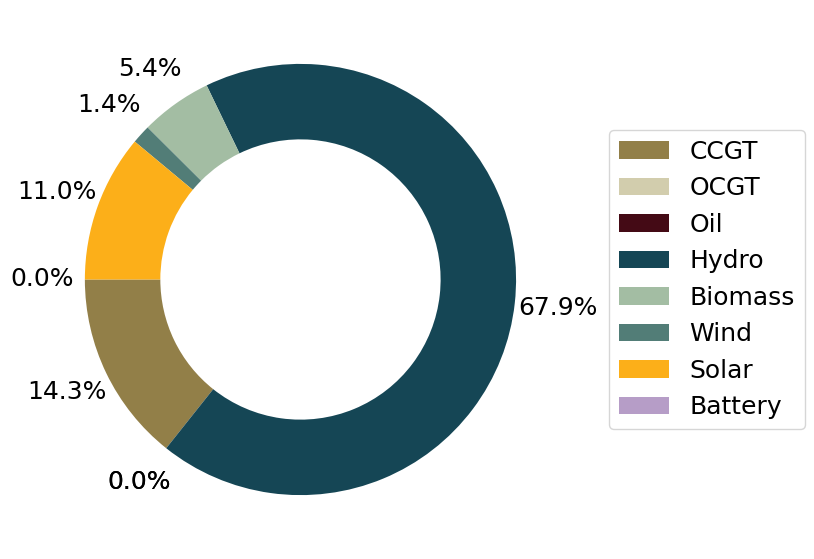

In [53]:
indices = ['CCGT','OCGT','Oil','Hydro','Biomass','Wind','Solar','Battery'] #'Battery',
data = [CCGT.sum(), OCGT.sum(), Oil.sum(),Hydro.sum(),biomass.sum(), Onwind.sum(),solar.sum(),sum(pbattery)] #battery.sum()
colors = [  beige1, beige3,brown, teal2,green3,teal3,yellow,purple3] #purple3,

Power_mix = pd.Series(data, index=indices)
Power_mix.plot.pie(labels = ['','','','','','', '','','',''], startangle=180,colors=colors,wedgeprops={'width': 0.35},autopct='%1.1f%%', pctdistance=1.2,
                   figsize=(12,7)) # autopct='%1.1f%%',

plt.legend(labels = indices, loc='center left', bbox_to_anchor=(1.05, 0.5))
leg = '_no_legend'
#leg =''
#plt.savefig(scen_path+f'{scen}_power_mix{leg}_{year}_battery{direct}.pdf', dpi=300, format='pdf', bbox_inches='tight') # _no_legend

## Power Mix without battery

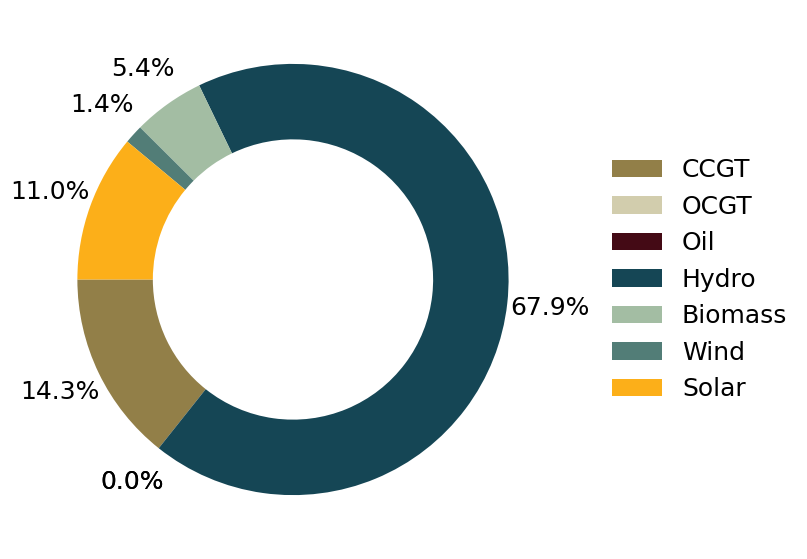

In [55]:
indices = ['CCGT','OCGT','Oil','Hydro','Biomass','Wind','Solar'] 
#indices = ['Hydro','Biomass','Wind','Solar'] 
data = [CCGT.sum(), OCGT.sum(), Oil.sum(),Hydro.sum(),biomass.sum(), Onwind.sum(),solar.sum()] 
#data = [Hydro.sum(),biomass.sum(), Onwind.sum(),solar.sum()] 
colors = [  beige1, beige3,brown, teal2,green3,teal3,yellow] 
#colors = [teal2,green3,teal3,yellow] 

Power_mix = pd.Series(data, index=indices)
Power_mix.plot.pie(labels = ['','','','','','', '','',''], startangle=180,colors=colors,wedgeprops={'width': 0.35},autopct='%1.1f%%', pctdistance=1.2,
                   figsize=(12,7)) # autopct='%1.1f%%',

plt.legend(labels = indices, loc='center left', bbox_to_anchor=(1.05, 0.5),frameon=False)
#leg = '_no_legend'
leg =''
#plt.savefig(scen_path+f'{case}_power_mix{leg}_{year}{direct}.pdf', dpi=300, format='pdf', bbox_inches='tight') # _no_legend
#plt.savefig(val_path+f'{case}_power_mix{leg}.pdf', dpi=300, format='pdf', bbox_inches='tight') # _no_legend

NameError: name 'case' is not defined

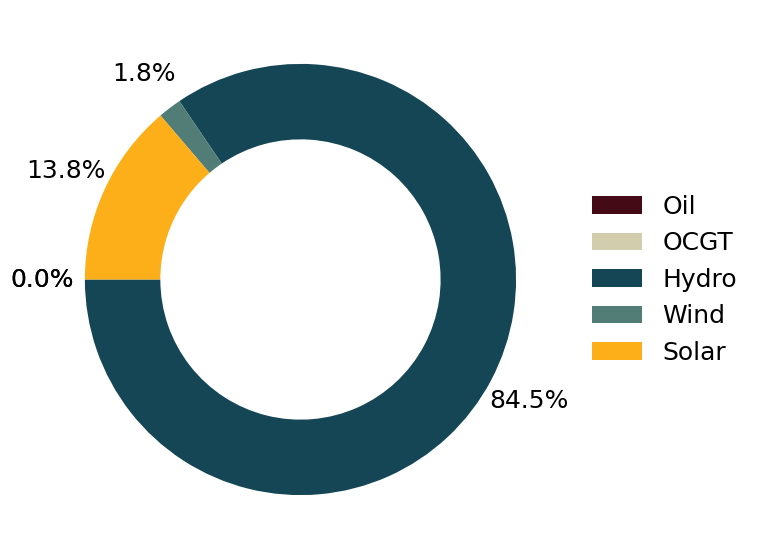

In [56]:
#plot for case 1

indices = ['Oil','OCGT','Hydro', 'Wind','Solar']
data = [Oil.sum(), OCGT.sum(), Hydro.sum(), Onwind.sum(),solar.sum()]
colors = [brown, beige3, teal2,teal3,yellow]

Power_mix = pd.Series(data, index=indices)
Power_mix.plot.pie(labels = ['','','','',''], startangle=180,colors=colors,wedgeprops={'width': 0.35},autopct='%1.1f%%', pctdistance=1.2,
                   figsize=(12,7)) # autopct='%1.1f%%',

plt.legend(labels = indices, loc='center left', bbox_to_anchor=(1.0, 0.5),frameon = False)
plt.savefig(val_path+f'power_mix/Power_mix_{case}.pdf', dpi=300, format='pdf', bbox_inches='tight') # _no_legend

# Average marginal costs

In [65]:
mc_mean = {'CCGT' : CCGT.sum()*mc_total['CCGT']/demand.sum()*(-1),
           'OCGT':  OCGT.sum()*mc_total['OCGT']/demand.sum()*(-1),
           'oil' :  Oil.sum()*mc_total['oil']/demand.sum()*(-1),
           'solar': solar.sum()*mc_total['solar']/demand.sum()*(-1),
           'onwind' :  Onwind.sum()*mc_total['onwind']/demand.sum()*(-1),
           'biomass' : biomass.sum()*mc_total['biomass']/demand.sum()*(-1),
           #'hydro' :  Hydro.sum()*mc_total['hydro']/demand.sum()*(-1), 
           'ror' :  ror.sum()*mc_total['ror']/demand.sum()*(-1)
}

mc_mean


{'CCGT': 6.753094741669447,
 'OCGT': 7.450684949376428e-08,
 'oil': 4.614072658137656e-09,
 'solar': 0.0022822451770484068,
 'onwind': 0.00036467999284145556,
 'biomass': 0.8049657538992289,
 'ror': 0.0036010253430064443}

In [66]:
mc_mean = {'CCGT' : CCGT.sum()*mc_total_ref['CCGT']/demand.sum()*(-1),
           'OCGT':  OCGT.sum()*mc_total_ref['OCGT']/demand.sum()*(-1),
           'oil' :  Oil.sum()*mc_total_ref['oil']/demand.sum()*(-1),
           'solar': solar.sum()*mc_total_ref['solar']/demand.sum()*(-1),
           'onwind' :  Onwind.sum()*mc_total_ref['onwind']/demand.sum()*(-1),
           'biomass' : biomass.sum()*mc_total_ref['biomass']/demand.sum()*(-1),
           #'hydro' :  Hydro.sum()*mc_total_ref['hydro']/demand.sum()*(-1)
           'ror' :  ror.sum()*mc_total_ref['ror']/demand.sum()*(-1)
}

pd.Series(mc_mean).sum()

NameError: name 'mc_total_ref' is not defined

# Full load hours


In [67]:
n.statistics()

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                8.848292e-01         1.823225e+07   
            Combined-Cycle Gas     1.131497e-01         1.152150e+08   
            Oil                    3.255992e-09         4.488738e+05   
            Onshore Wind           1.193336e-01         1.391770e+07   
            Open-Cycle Gas         1.450738e-09         4.482182e+07   
            Run of River           9.999995e-01         9.822414e+07   
            Solar                  1.956445e-01         3.098321e+07   
            load                   2.954993e-15         0.000000e+00   
Line        AC                     1.862311e-01         2.314050e+07   
Link        battery charger        3.037718e-01         4.213023e-01   
            battery discharger     2.460551e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        9.999996e-01         0.000000e+00   
Store       Battery Storage        4.999872e-01         4.323072e-01   

                                 Curtailment      Dispatch  \
            carrier                                          
Generator   Biomass                 0.000000  5.083174e+05   
            Combined-Cycle Gas      0.000000  1.351975e+06   
            Oil                     0.000000  3.348540e-04   
            Onshore Wind        12720.362649  1.331165e+05   
            Open-Cycle Gas          0.000000  1.205931e-02   
            Run of River            0.000000  3.175761e+06   
            Solar                5427.850562  1.044134e+06   
            load                    0.000000  1.035430e-04   
Line        AC                           NaN -6.515047e+05   
Link        battery charger              NaN -2.911371e-02   
            battery discharger           NaN -2.620234e-02   
Load        -                            NaN -9.451612e+06   
StorageUnit Reservoir & Dam         0.000000  3.238308e+06   
Store       Battery Storage              NaN  2.710505e-19   

                                Installed Capacity  Market Value  \
            carrier                                                
Generator   Biomass                   6.558000e+01  4.453007e+01   
            Combined-Cycle Gas        1.363990e+03  4.720939e+01   
            Oil                       1.174000e+01  4.211614e+01   
            Onshore Wind              1.273400e+02  3.898219e+01   
            Open-Cycle Gas            9.489200e+02  4.533150e+01   
            Run of River              3.625300e+02  4.019288e+01   
            Solar                     1.649000e+02  2.903062e+01   
            load                      4.000000e+09  4.041728e+04   
Line        AC                        3.932448e+03 -4.664783e-04   
Link        battery charger           0.000000e+00 -1.389109e+00   
            battery discharger        0.000000e+00  3.429976e+00   
Load        -                                  NaN -4.017966e+01   
StorageUnit Reservoir & Dam           3.696700e+02  4.019287e+01   
Store       Battery Storage           0.000000e+00  2.083010e+19   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Biomass                        7.607860e+06      6.558000e+01   
            Combined-Cycle Gas             6.382589e+07      1.363990e+03   
            Oil                            4.361042e-02      1.174000e+01   
            Onshore Wind                   3.326332e+03      1.273400e+02   
            Open-Cycle Gas                 7.042044e-01      9.489200e+02   
            Run of River                   3.307218e+04      3.625300e+02   
            Solar                          2.062557e+04      6.092346e+02   
            load                           1.045491e-01      4.000000e+09   
Line        AC             

In [68]:
# Generated power / installed capacity

df = n.statistics()['Optimal Capacity']
bio_cap = df['Generator','Biomass']
ccgt_cap = df['Generator','Combined-Cycle Gas']
ocgt_cap = df['Generator','Open-Cycle Gas']
oil_cap = df['Generator','Oil']
wind_cap = df['Generator','Onshore Wind']
solar_cap = df['Generator','Solar']
hydro_cap = df['StorageUnit','Reservoir & Dam']

FLH_bio = biomass.sum()/bio_cap/8760
FLH_ccgt = CCGT.sum()/ccgt_cap/8760
FLH_ocgt = OCGT.sum()/ocgt_cap/8760
FLH_oil = Oil.sum()/oil_cap/8760
FLH_wind = Onwind.sum()/wind_cap/8760
FLH_solar = solar.sum()/solar_cap/8760
FLH_hydro = Hydro.sum()/hydro_cap/8760

print(FLH_bio)
print(FLH_ccgt)
print(FLH_ocgt)
print(FLH_oil)
print(FLH_wind)
print(FLH_solar)
print(FLH_hydro)
df


0.8848291622900368
0.11314965298781975
1.4507377478095695e-09
3.2559917725340486e-09
0.11933361375936376
0.19564451884948866
1.980684552546394


             carrier           
Generator    Biomass               6.558000e+01
             Combined-Cycle Gas    1.363990e+03
             Oil                   1.174000e+01
             Onshore Wind          1.273400e+02
             Open-Cycle Gas        9.489200e+02
             Run of River          3.625300e+02
             Solar                 6.092346e+02
             load                  4.000000e+09
Line         AC                    2.276681e+03
Link         battery charger       1.094072e-05
             battery discharger    1.215636e-05
Load         -                              NaN
StorageUnit  Reservoir & Dam       3.696700e+02
Store        Battery Storage       2.722700e-05
Name: Optimal Capacity, dtype: float64

In [69]:
n.storage_units.p_max_pu

StorageUnit
BO0 0 hydro    1.0
BO0 1 hydro    1.0
BO0 2 hydro    1.0
Name: p_max_pu, dtype: float64

In [70]:
display(biomass.sum())
display(CCGT.sum())
display(OCGT.sum())
display(Oil.sum())
display(Onwind.sum())
display(solar.sum())
display(Hydro.sum())

508317.36524569994

1351974.5578580284

0.012059314401208781

0.0003348540085452808

133116.45618969947

1044134.2648925951

6414069.008808872

In [72]:
n.generators

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,bus,carrier,p_nom_extendable,...,q_set,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
BO0 0 CCGT,inf,0.000000,4.543000e+02,84469.122809,0.500,454.30,47.210673,BO0 0,CCGT,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 0 OCGT,inf,0.000000,3.450000e+01,47234.561404,0.390,34.50,58.394418,BO0 0,OCGT,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 0 onwind,6.670039e+05,44390.495091,0.000000e+00,109295.569252,1.000,0.00,0.024636,BO0 0,onwind,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 0 ror,inf,19.040000,1.904000e+01,270940.715283,0.900,0.00,0.009317,BO0 0,ror,False,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 0 solar,8.019631e+05,158543.967507,6.470000e+01,50855.958267,1.000,64.70,0.019757,BO0 0,solar,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 1 CCGT,inf,0.000000,3.967700e+02,84469.122809,0.500,396.77,47.209381,BO0 1,CCGT,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 1 OCGT,inf,0.000000,4.960500e+02,47234.561404,0.390,496.05,58.395302,BO0 1,OCGT,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 1 onwind,1.068666e+05,2655.718661,2.654000e+01,109295.569252,1.000,26.54,0.025893,BO0 1,onwind,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO0 1 ror,inf,130.430000,1.304300e+02,270940.715283,0.900,0.00,0.010717,BO0 1,ror,False,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


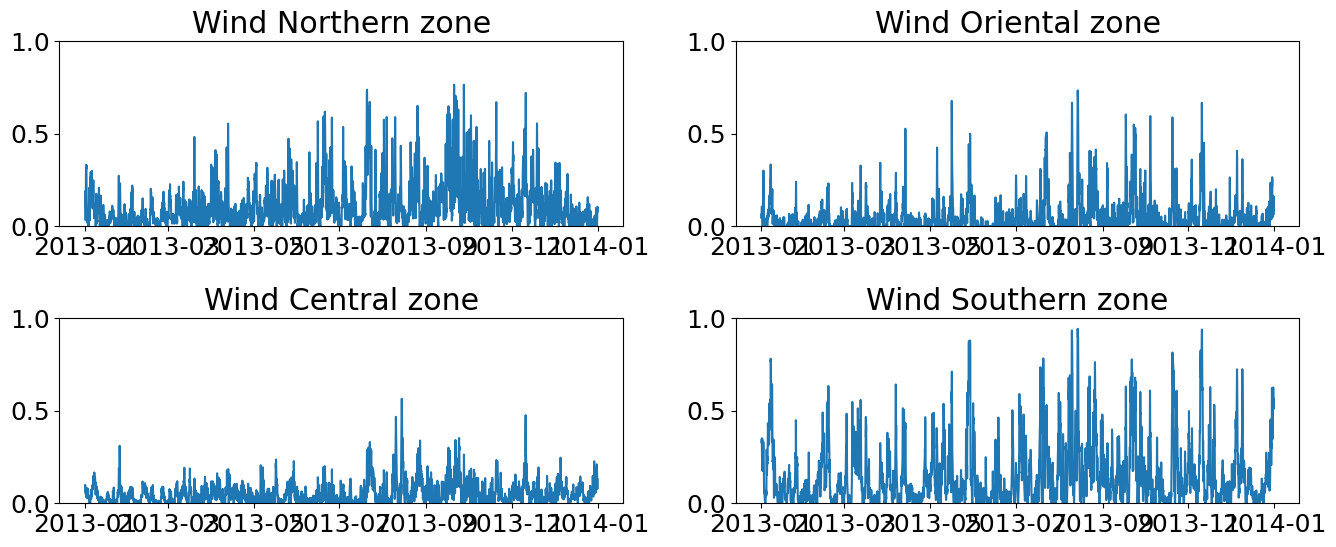

In [75]:
fig, axs = plt.subplots(2,2, figsize=(16,6))


axs[0, 0].plot(n.generators_t.p_max_pu['BO0 0 onwind'])
axs[0, 0].set_title('Wind Northern zone')
axs[0, 0].set_ylim(0, 1)

axs[0, 1].plot(n.generators_t.p_max_pu['BO0 1 onwind'])
axs[0, 1].set_title('Wind Oriental zone')
axs[0, 1].set_ylim(0, 1)

axs[1, 0].plot(n.generators_t.p_max_pu['BO0 2 onwind'])
axs[1, 0].set_title('Wind Central zone')
axs[1, 0].set_ylim(0, 1)

axs[1, 1].plot(n.generators_t.p_max_pu['BO0 3 onwind'])
axs[1, 1].set_title('Wind Southern zone')
axs[1, 1].set_ylim(0, 1)

plt.subplots_adjust(hspace=0.5)


In [76]:

n.generators_t.p_max_pu.describe()



Generator,BO0 0 onwind,BO0 0 solar,BO0 1 onwind,BO0 1 solar,BO0 2 onwind,BO0 2 solar,BO0 3 onwind,BO0 3 solar
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.107579,0.201055,0.051714,0.159982,0.053657,0.174342,0.151543,0.140165
std,0.121341,0.255307,0.088751,0.211269,0.060091,0.223160,0.168993,0.188561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.026582,0.000000,0.000000,0.000000,0.012637,0.000000,0.031115,0.000000
50%,0.064936,0.000000,0.020260,0.000000,0.038235,0.000000,0.091173,0.000000
75%,0.146156,0.444294,0.063408,0.331211,0.076303,0.382618,0.213272,0.281715
max,0.765553,0.763458,0.733772,0.696719,0.565724,0.690691,0.943737,0.653934


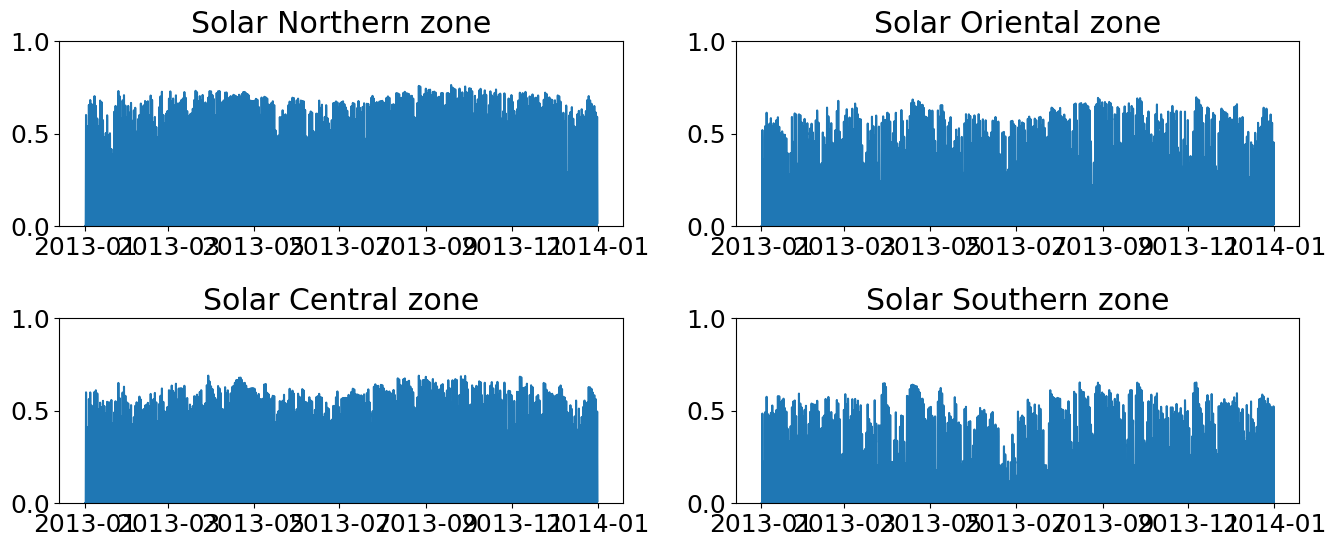

In [78]:
fig, axs = plt.subplots(2,2, figsize=(16,6))


axs[0, 0].plot(n.generators_t.p_max_pu['BO0 0 solar'])
axs[0, 0].set_title('Solar Northern zone')
axs[0, 0].set_ylim(0, 1)

axs[0, 1].plot(n.generators_t.p_max_pu['BO0 1 solar'])
axs[0, 1].set_title('Solar Oriental zone')
axs[0, 1].set_ylim(0, 1)

axs[1, 0].plot(n.generators_t.p_max_pu['BO0 2 solar'])
axs[1, 0].set_title('Solar Central zone')
axs[1, 0].set_ylim(0, 1)

axs[1, 1].plot(n.generators_t.p_max_pu['BO0 3 solar'])
axs[1, 1].set_title('Solar Southern zone')
axs[1, 1].set_ylim(0, 1)

plt.subplots_adjust(hspace=0.5)

Generator
BO0 0 CCGT       1.0
BO0 0 OCGT       1.0
BO0 0 onwind     1.0
BO0 0 ror        1.0
BO0 0 solar      1.0
BO0 1 CCGT       1.0
BO0 1 OCGT       1.0
BO0 1 onwind     1.0
BO0 1 ror        1.0
BO0 1 solar      1.0
BO0 2 OCGT       1.0
BO0 2 biomass    1.0
BO0 2 oil        1.0
BO0 2 onwind     1.0
BO0 2 ror        1.0
BO0 2 solar      1.0
BO0 3 CCGT       1.0
BO0 3 OCGT       1.0
BO0 3 biomass    1.0
BO0 3 onwind     1.0
BO0 3 solar      1.0
BO0 0 load       1.0
BO0 1 load       1.0
BO0 2 load       1.0
BO0 3 load       1.0
Name: p_max_pu, dtype: float64

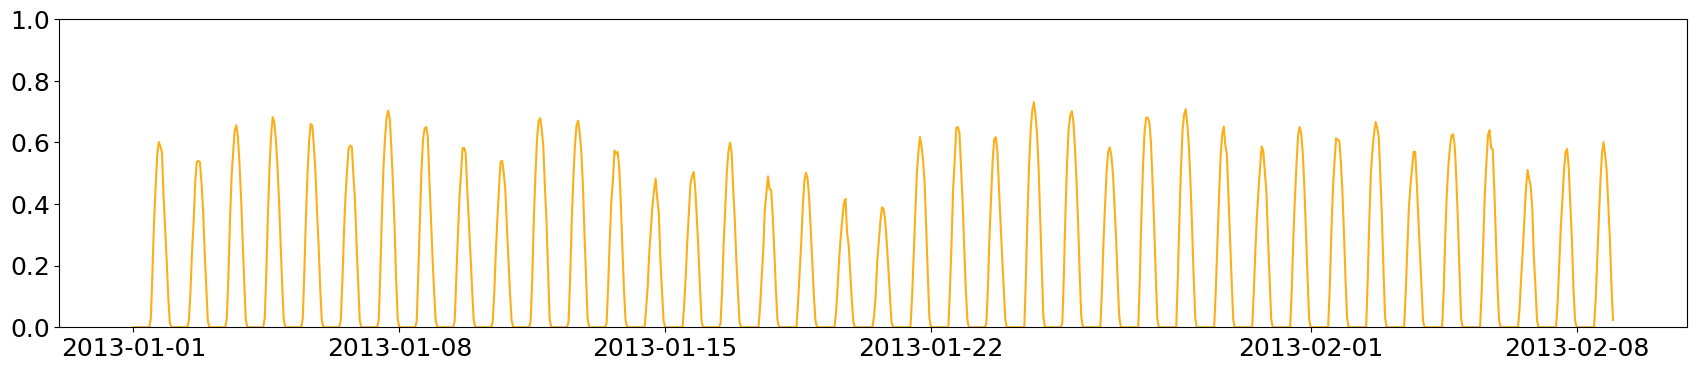

In [81]:
first_date = "2013-01-01"
second_date = "2013-02-08"

plt.figure(figsize = (21,4))
plt.plot(n.generators_t.p_max_pu['BO0 0 solar'].loc[first_date:second_date],color = yellow)
plt.ylim(0,1)
n.generators_t.p_max_pu['BO0 0 solar']
n.generators.p_max_pu





# Further analysis
The following notebooks provide additional analysis, plots and validation of the networks:

[Plot osm network](./0_build_osm_network_plot.ipynb)

[Explore network](./0_network_exploration.ipynb)

[Check outputs of build_shapes script](./0build_shapes.ipynb)

[Compare shapes for countries](./0shape_comparison.ipynb)

[Check base network](./base_network.ipynb)

[Check outputs of add_electricity script](./add_electricity.ipynb)

[Check outputs of augmented_line_connections script](./augmented_line_connections.ipynb)

[Test the built cutouts](./build_cutout.ipynb)

[Test the renewable profiles](./build_renewable_profiles.ipynb)

[Check land use availability](./land_use_availability.ipynb)

[Check network characteristics before solving](./network_characteristics_before_solve.ipynb)

[Some nice plots for presentations](./nice_plotting_for_presentations.ipynb)

[Download OSM and make adjustments](./openstreetmap_download_and_adjustments.ipynb)

[Visualise clustering](./visualise_clustering.ipynb)

The following notebooks could be used for validation:

[Capacity validation](./capacity_validation.ipynb)

[Demand validation](./demand_validation.ipynb)

[Hydro generation validation](./hydro_generation_validation.ipynb)

[Network validation](./network_validation.ipynb)

[Renewable potential validation](./renewable_potential_validation.ipynb)




# Checks

In [82]:
n.links.p_nom_max

Link
BO0 0 battery charger       inf
BO0 1 battery charger       inf
BO0 2 battery charger       inf
BO0 3 battery charger       inf
BO0 0 battery discharger    inf
BO0 1 battery discharger    inf
BO0 2 battery discharger    inf
BO0 3 battery discharger    inf
Name: p_nom_max, dtype: float64